In [57]:
import glob
import os

# Path to the directory to search for files
directory_path = r'Analysis'

# Pattern to match the files
file_pattern = 'result_*'

# Recursively find all files matching the pattern
file_paths = glob.glob(os.path.join(directory_path, '**', file_pattern), recursive=True)
print(f"Found {len(file_paths)} files matching the pattern.")

Found 32 files matching the pattern.


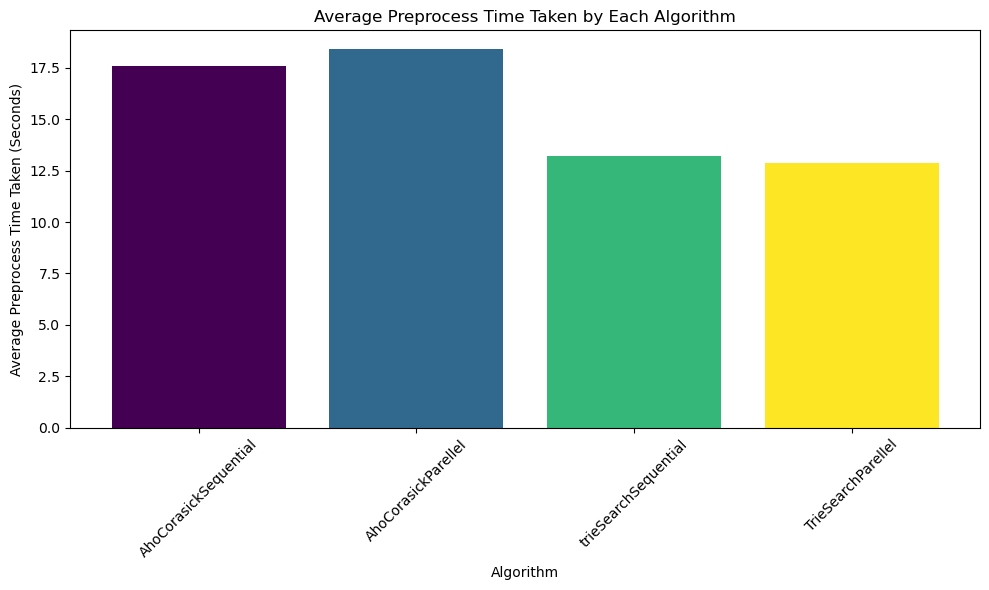

In [58]:
import json
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

# Function to parse a single JSON file
def parse_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return {
            'Algorithm': data['Algorithm'],
            'Preprocess Time Taken': data['Preprocess Time Taken'],
        }

# Scan for files
file_paths = scan_for_files(directory_path, file_pattern)

# Parse all found files
parsed_data = [parse_json_file(path) for path in file_paths]

# Organize data by algorithm
data_by_algorithm = {}
for entry in parsed_data:
    alg = entry['Algorithm']
    time_taken = float(entry['Preprocess Time Taken'])
    if alg not in data_by_algorithm:
        data_by_algorithm[alg] = []
    data_by_algorithm[alg].append(time_taken)

# Calculate the average preprocess time for each algorithm
algorithm_names = list(data_by_algorithm.keys())
average_preprocess_times = [sum(times) / len(times) for times in data_by_algorithm.values()]

# Converting preprocess times to seconds for a better scale in the graph
average_preprocess_times_seconds = [time / 1e6 for time in average_preprocess_times]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(algorithm_names)))
plt.bar(algorithm_names, average_preprocess_times_seconds, color=colors)
plt.xlabel('Algorithm')
plt.ylabel('Average Preprocess Time Taken (Seconds)')
plt.title('Average Preprocess Time Taken by Each Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


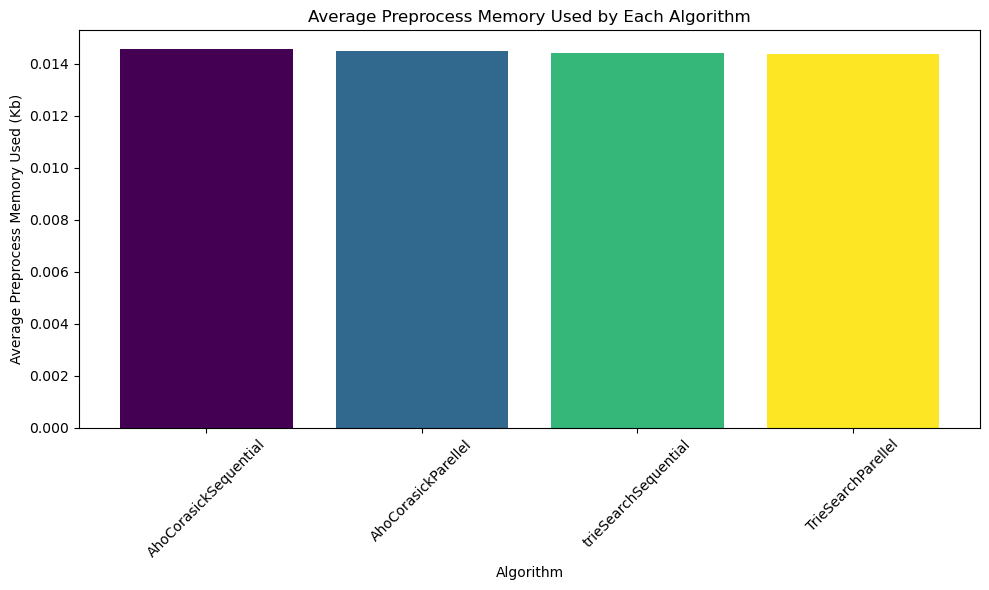

In [59]:
import json
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

# Function to parse a single JSON file
def parse_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return {
            'Algorithm': data['Algorithm'],
            'Preprocess Memory Used': data['Preprocess Memory Used'],
        }

# Scan for files
file_paths = scan_for_files(directory_path, file_pattern)

# Parse all found files
parsed_data = [parse_json_file(path) for path in file_paths]

# Organize data by algorithm
data_by_algorithm = {}
for entry in parsed_data:
    alg = entry['Algorithm']
    time_taken = float(entry['Preprocess Memory Used'])
    if alg not in data_by_algorithm:
        data_by_algorithm[alg] = []
    data_by_algorithm[alg].append(time_taken)

# Calculate the average preprocess time for each algorithm
algorithm_names = list(data_by_algorithm.keys())
average_preprocess_times = [sum(times) / len(times) for times in data_by_algorithm.values()]

# Converting preprocess times to seconds for a better scale in the graph
average_preprocess_times_seconds = [time / 1e6 for time in average_preprocess_times]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(algorithm_names)))
plt.bar(algorithm_names, average_preprocess_times_seconds, color=colors)
plt.xlabel('Algorithm')
plt.ylabel('Average Preprocess Memory Used (Kb)')
plt.title('Average Preprocess Memory Used by Each Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


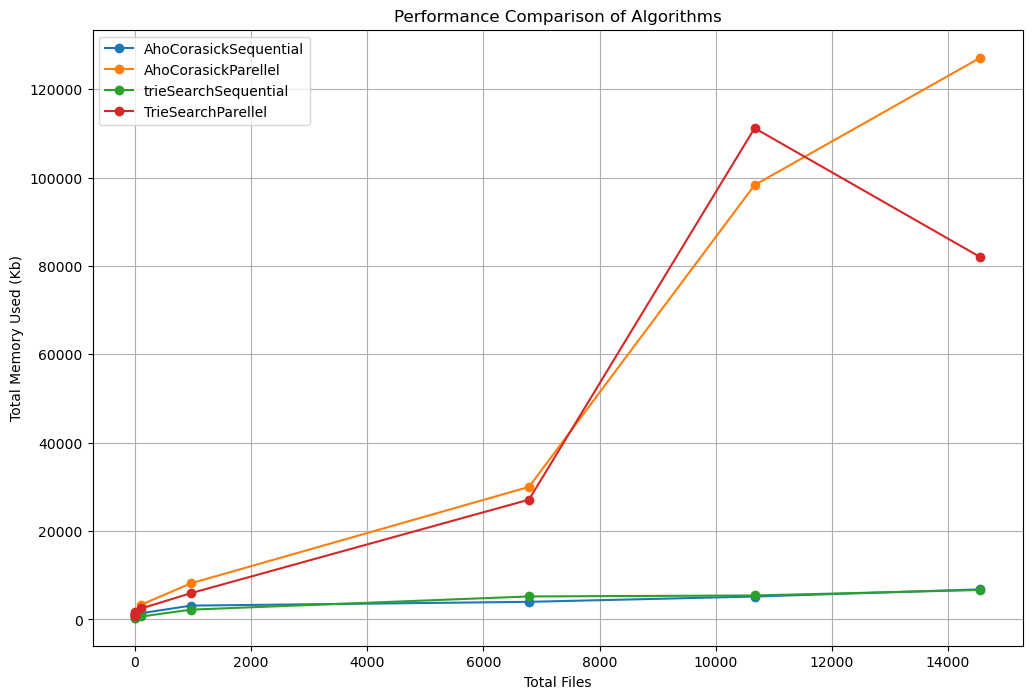

In [60]:
import json
import matplotlib.pyplot as plt

# Function to parse a single JSON file
def parse_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return {
            'Algorithm': data['Algorithm'],
            'Total Memory Used': float(data['Total Memory Used']),
            'totalFiles': int(data['totalFiles'])
        }

# Scan for files
file_paths = scan_for_files(directory_path, file_pattern)

# Parse all found files
parsed_data = [parse_json_file(path) for path in file_paths]

# Organize data by algorithm
data_by_algorithm = {}
for entry in parsed_data:
    alg = entry['Algorithm']
    if alg not in data_by_algorithm:
        data_by_algorithm[alg] = []
    data_by_algorithm[alg].append((entry['totalFiles'], entry['Total Memory Used']))

# Sort data by totalFiles for each algorithm
for alg in data_by_algorithm:
    data_by_algorithm[alg] = sorted(data_by_algorithm[alg], key=lambda x: x[0])

# Plotting
plt.figure(figsize=(12, 8))
for alg, data in data_by_algorithm.items():
    total_files = [x[0] for x in data]
    times = [x[1] for x in data]
    plt.plot(total_files, times, marker='o', label=alg)

plt.title('Performance Comparison of Algorithms')
plt.xlabel('Total Files')
plt.ylabel('Total Memory Used (Kb)')
plt.legend()
plt.grid(True)
plt.show()


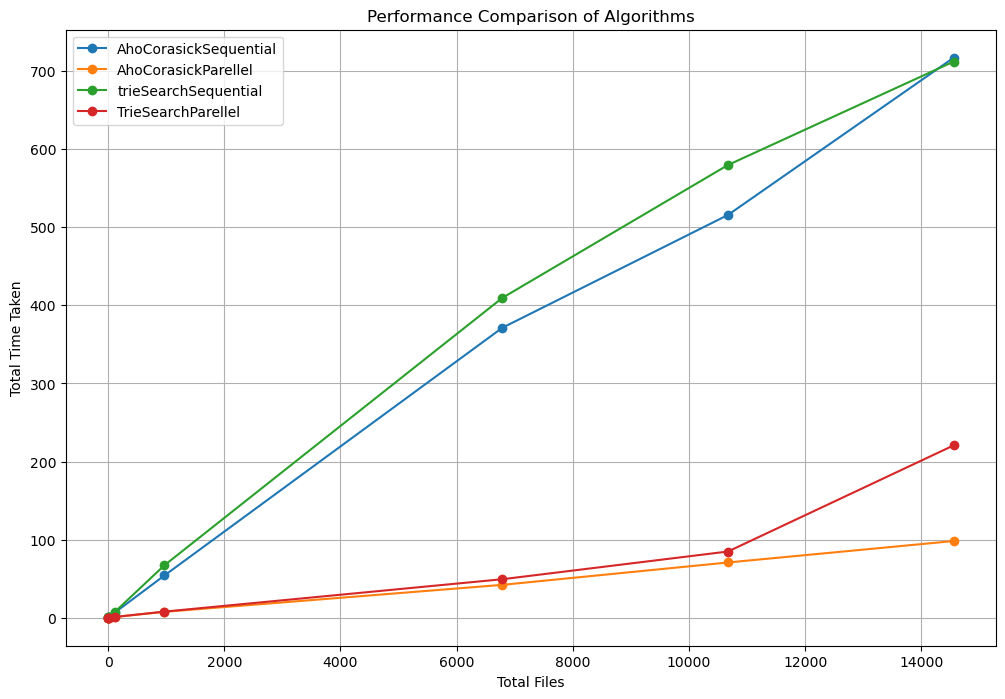

In [61]:
import json
import matplotlib.pyplot as plt

# Function to parse a single JSON file
def parse_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return {
            'Algorithm': data['Algorithm'],
            'Total Time Taken': float(data['Total Time Taken']),
            'totalFiles': int(data['totalFiles'])
        }

# Scan for files
file_paths = scan_for_files(directory_path, file_pattern)

# Parse all found files
parsed_data = [parse_json_file(path) for path in file_paths]

# Organize data by algorithm
data_by_algorithm = {}
for entry in parsed_data:
    alg = entry['Algorithm']
    if alg not in data_by_algorithm:
        data_by_algorithm[alg] = []
    data_by_algorithm[alg].append((entry['totalFiles'], entry['Total Time Taken']))

# Sort data by totalFiles for each algorithm
for alg in data_by_algorithm:
    data_by_algorithm[alg] = sorted(data_by_algorithm[alg], key=lambda x: x[0])

# Plotting
plt.figure(figsize=(12, 8))
for alg, data in data_by_algorithm.items():
    total_files = [x[0] for x in data]
    times = [x[1] for x in data]
    plt.plot(total_files, times, marker='o', label=alg)

plt.title('Performance Comparison of Algorithms')
plt.xlabel('Total Files')
plt.ylabel('Total Time Taken')
plt.legend()
plt.grid(True)
plt.show()
